In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, precision_recall_curve, auc
from sklearn.preprocessing import LabelEncoder
import statistics
from urllib.parse import urlparse
import matplotlib.pyplot as plt

In [2]:
# read data into a pandas DataFrame
data_df = pd.read_csv('data.csv')
data_df.head()

,actual query,query,old,noogle,google
0,nepal nagrita number check online citizenship,nepal nagrita number check online,"https://nagarikapp.gov.np, https://nepal.gov.n...","http://drrportal.gov.np/news/newsdetail/19, ht...","https://www.moha.gov.np, http://online.nepalim..."
1,ocr nepal company,ocr nepal company,"https://application.ocr.gov.np, https://www.oc...",https://nepal.gov.np:8443/NationalPortal/view-...,"https://www.sanjun.com.np, http://nepal.gov.np..."
2,company search nepal,company search nepal,"http://nepal.gov.np, https://www.ocr.gov.np, h...",https://nepal.gov.np:8443/NationalPortal/view-...,"http://nepal.gov.np, https://nepal.gov.np:8443..."
3,nepal government party,nepal government party,"https://mofa.gov.np, http://nepal.gov.np, http...",https://nepal.gov.np:8443/NationalPortal/view-...,"http://nepal.gov.np, https://www.opmcm.gov.np/..."
4,nepal government job,nepal government job,"https://mofa.gov.np, http://nepal.gov.np, http...","http://nepal.gov.np/, https://www.nepal.gov.np...",https://nepal.gov.np:8443/NationalPortal/view-...


In [3]:
def strip(url):
    parsed_url = urlparse(url)
    return parsed_url.hostname

def calculate_metrics(row):
    # extract the actual and predicted values for the row
    actual = row['google'].split(', ')
    predicted = row['noogle'].split(', ')
    
    
    stripped_actual = [strip(url) for url in actual]
    stripped_predicted = [strip(url) for url in predicted]

    act = actual
    prdt = predicted
    
    labels = set(act + prdt)
    y_true = [1 if label in act else 0 for label in labels]
    y_pred = [1 if label in prdt else 0 for label in labels]

    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)

    auc_pr = auc(recall, precision)
    
    metrics = {}

    metrics['recall'] = statistics.mean(recall)
    metrics['precision'] = statistics.mean(precision)

    metrics['arr-precision'] = precision
    metrics['arr-recall'] = recall

    metrics['auc_pr'] = auc_pr
    
    
    metrics['query'] = row['query']

    return pd.Series(metrics)

results = data_df.apply(calculate_metrics, axis=1)
results = pd.melt(results, id_vars=['query'], var_name='metric', value_name='value')

In [4]:
recall = data_df.apply(lambda row: calculate_metrics(row)['recall'], axis=1)
precision = data_df.apply(lambda row: calculate_metrics(row)['precision'], axis=1)

arr_precision = data_df.apply(lambda row: calculate_metrics(row)['arr-precision'], axis=1)
arr_recall = data_df.apply(lambda row: calculate_metrics(row)['arr-recall'], axis=1)

auc_pr = data_df.apply(lambda row: calculate_metrics(row)['auc_pr'], axis=1)

results = pd.concat([data_df['query'], precision, arr_precision, recall, arr_recall, auc_pr], axis=1)

# column_names = {'query': 'query', 0: 'accuracy', 1: 'precision', 2: 'recall', 3: 'f1-score'}
column_names = {'query': 'query', 0: 'precision', 1: "arr-precision", 2: "recall", 3: "arr-recall", 4: "auc-pr"}
results = results.rename(columns=column_names)
results = results.reset_index().rename(columns={'index': 'new_index'})

In [5]:
results.head(50)

,new_index,query,precision,arr-precision,recall,arr-recall,auc-pr
0,0,nepal nagrita number check online,0.369960,"[0.09900990099009901, 0.010869565217391304, 1.0]",0.366667,"[1.0, 0.1, 0.0]",0.099989
1,1,ocr nepal company,0.404958,"[0.18487394957983194, 0.03, 1.0]",0.378788,"[1.0, 0.13636363636363635, 0.0]",0.163014
2,2,company search nepal,0.563545,"[0.42063492063492064, 0.27, 1.0]",0.503145,"[1.0, 0.5094339622641509, 0.0]",0.492892
3,3,nepal government party,0.622905,"[0.45871559633027525, 0.41, 1.0]",0.606667,"[1.0, 0.82, 0.0]",0.656284
4,4,nepal government job,0.846606,"[0.7798165137614679, 0.76, 1.0]",0.631373,"[1.0, 0.8941176470588236, 0.0]",0.868343
5,5,nepal government news,0.982000,"[0.976, 0.97, 1.0]",0.598361,"[1.0, 0.7950819672131147, 0.0]",0.982541
6,6,opmcm bagmati,0.401111,"[0.18333333333333332, 0.02, 1.0]",0.363636,"[1.0, 0.09090909090909091, 0.0]",0.138788
7,7,मन्त्रिपरिषद्का निर्णयहरु,0.766197,"[0.6697247706422018, 0.6288659793814433, 1.0]",0.611872,"[1.0, 0.8356164383561644, 0.0]",0.787287
8,8,नेपालको प्रधानमन्त्री 2080,0.443275,"[0.2631578947368421, 0.06666666666666667, 1.0]",0.400000,"[1.0, 0.2, 0.0]",0.238596
9,9,home ministry of nepal,0.924527,"[0.9135802469135802, 0.86, 1.0]",0.527027,"[1.0, 0.581081081081081, 0.0]",0.911899


In [6]:
def removeRow(row):
    return row['precision'] < 0.3 or row['recall'] < 0.3 or row['auc-pr'] < 0.3

new_results = results[~results.apply(removeRow, axis=1)]

In [7]:
graph_results = new_results.set_index('new_index')

In [8]:
# graph visualization
graph_colors = ['r', 'g', 'b']

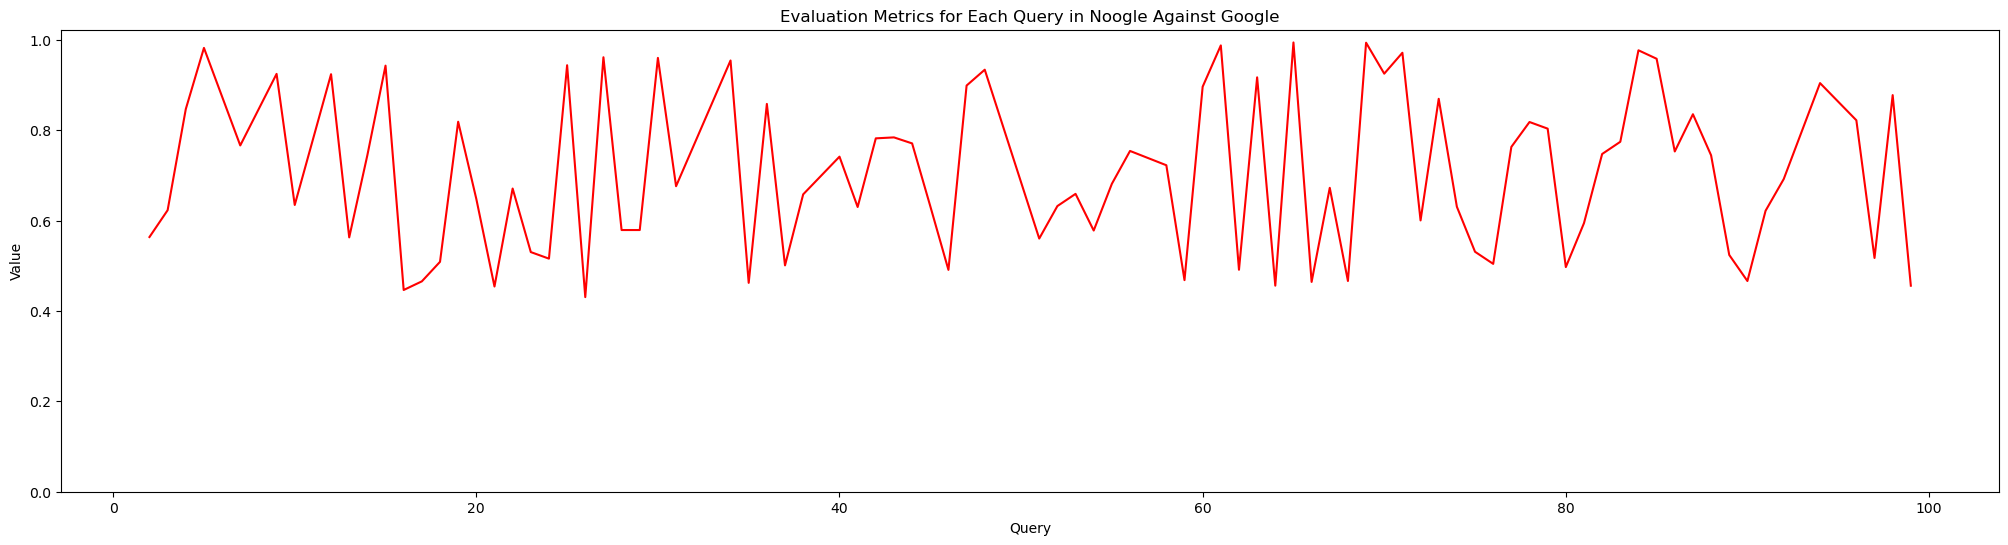

In [9]:
px = graph_results["precision"].plot(kind='line', figsize=(25,6), rot=0,  color="r")
px.set_ylim(ymin=0)
px.set_title('Evaluation Metrics for Each Query in Noogle Against Google')
px.set_xlabel('Query')
px.set_ylabel('Value')

plt.show()

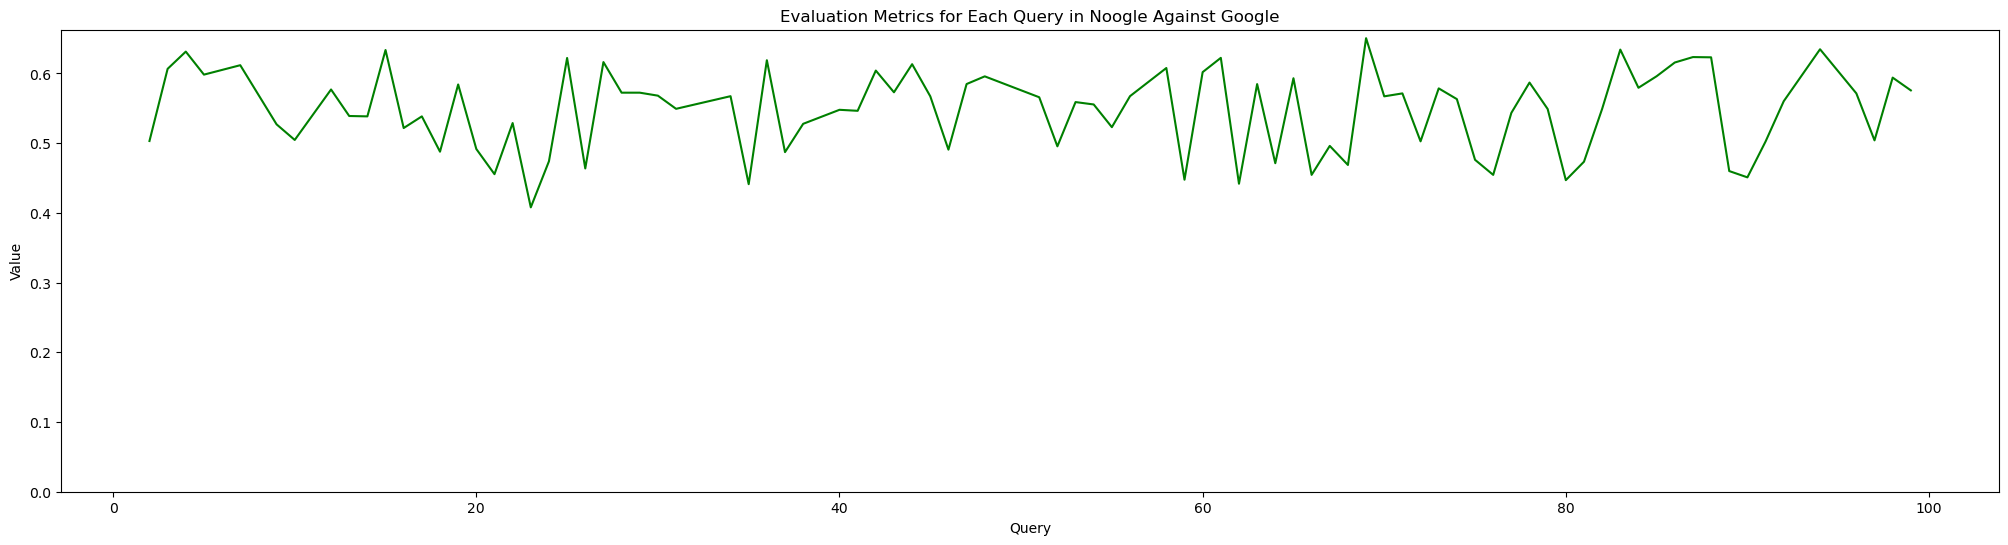

In [10]:
rx = graph_results["recall"].plot(kind='line', figsize=(25,6), rot=0,  color="g")
rx.set_ylim(ymin=0)

rx.set_title('Evaluation Metrics for Each Query in Noogle Against Google')
rx.set_xlabel('Query')
rx.set_ylabel('Value')

plt.show()

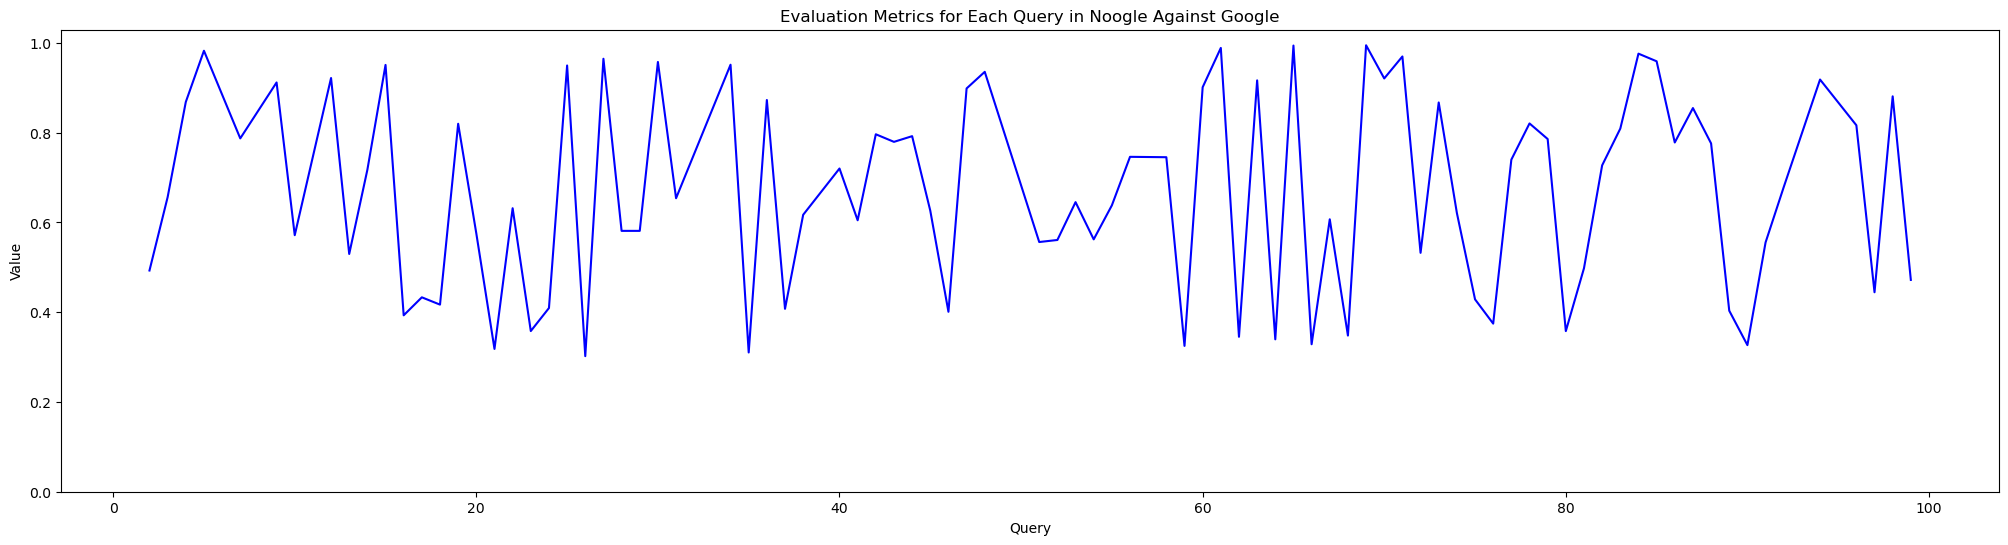

In [11]:
ax = graph_results["auc-pr"].plot(kind='line', figsize=(25,6), rot=0,  color="b")
ax.set_ylim(ymin=0)
ax.set_title('Evaluation Metrics for Each Query in Noogle Against Google')
ax.set_xlabel('Query')
ax.set_ylabel('Value')

plt.show()

In [12]:
mean_prc = results["precision"].mean()
mean_rcl = results["recall"].mean()
mean_f1 = results["auc-pr"].mean()

print("Precision: " + str(mean_prc))
print("Recall: " + str(mean_rcl))
print("AUC-PR " + str(mean_f1))

Precision: 0.6689773686635533
Recall: 0.5252287930322979
AUC-PR 0.6076344014181685


In [23]:
lowest_prc = results.nsmallest(1, 'precision')
highest_prc = results.nlargest(1, 'precision')

lowest_rcl = results.nsmallest(1, 'recall')
highest_rcl = results.nlargest(1, 'recall')

lowest_auc = results.nsmallest(1, 'auc-pr')
highest_auc = results.nlargest(1, 'auc-pr')

print("Precision: ")
print("Lowest:")
print(lowest_prc[['query', 'precision']])
print("Highest:")
print(highest_prc[['query', 'precision']])

print("--------------------")

print("Recall: ")
print("Lowest:")
print(lowest_rcl[['query', 'precision']])
print("Highest:")
print(highest_rcl[['query', 'precision']])



print("--------------------")

print("AUC-PR: ")
print("Lowest:")
print(lowest_auc[['query', 'precision']])
print("Highest:")
print(highest_auc[['query', 'precision']])



Precision: 
Lowest:
                               query  precision
0  nepal nagrita number check online    0.36996
Highest:
                                                query  precision
65  water resource and irrigation development divi...   0.994062
--------------------
Recall: 
Lowest:
                                                query  precision
39  Ministry of Physical Infrastructure Developmen...   0.414141
Highest:
                              query  precision
69  moph covid vaccine certificate    0.993492
--------------------
AUC-PR: 
Lowest:
                               query  precision
0  nepal nagrita number check online    0.36996
Highest:
                              query  precision
69  moph covid vaccine certificate    0.993492


In [37]:
lowest_rcl.loc[39, 'query']

'Ministry of Physical Infrastructure Development Province 1'